In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE

## 解題步驟：

1. 讀取 x_train.npy, y_train.npy, x_test.npy, y_test.npy
2. 將 training dataset 再切分為 training set, validation set (圖一)
3. 先以上課的知識調整出一個不會 over-fitting 太多的決策樹模型
4. 以 validation set 作為調整參數的基準，陸續調整其他參數 (請同學測試看看 validation 要佔多少比例，後續的調整會比較客觀)
5. 將最終調整結果與一開始的決策樹做比較，誤差是否有降低
6. 同學若也懂其他模型的知識也可以試試看一樣的做法比較看看

#### 圖一 (Train, Validation and Test)
<img src="./train_val_test.png" style="zoom:30%;" />

#### 圖二 (是我前後調整的結果)
<img src="./report.png" style="zoom:30%;" />

In [175]:
# Read data
""" Your code here """
x_all_train = np.load('x_train.npy')
x_test = np.load('x_test.npy')
y_all_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')
print(x_all_train.shape,  x_test.shape, y_all_train.shape, y_test.shape)




(1095, 89) (365, 89) (1095,) (365,)


## 請同學先依照上課的知識，調整一個沒有 overfitting 的決策樹，請以 mape 作為參考誤差指標，較容易看出關係

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE

In [282]:
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')



In [ ]:
# 切分驗證集
x_train, x_val, y_train, y_val = train_test_split(x_all_train, y_all_train, test_size = 0.20)
print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)

In [185]:
""" Your code here """

def regression_report(y_true, pred, verbose = False):
    mse = MSE(y_true, pred)
    mae = MAE(y_true, pred)
    rmse = np.sqrt(mse)
    mape = MAPE(y_true, pred)
    if verbose:
        print(f'mse = {mse:.4f}')
        print(f'mae = {mae:.4f}')
        print(f'rmse = {rmse:.4f}')
        print(f'mape = {mape:.4f}')
    re_list = [f'mse = {mse:.4f}', f'mae = {mae:.4f}', f'rmse = {rmse:.4f}', f'mape = {mape:.4f}']
    return re_list

# 模型參數
clf = DecisionTreeRegressor(criterion='mae', max_depth = 5, splitter = "best", max_features=0.99, random_state=90)
clf.fit(x_train, y_train)


tra_pred = clf.predict(x_train)
tra_rpt = regression_report(y_train, tra_pred)

val_pred = clf.predict(x_val)
val_rpt = regression_report(y_val, val_pred)

test_pred = clf.predict(x_test)
test_rpt = regression_report(y_test, test_pred)

for tr, v, tes in zip(tra_rpt, val_rpt, test_rpt):
    print(f"Training report:{tr}    validation report:{v}      Testing report:{tes}")




Training report:mse = 862036798.2580    validation report:mse = 903971229.7614      Testing report:mse = 1701166832.5377
Training report:mae = 18317.8105    validation report:mae = 20966.4680      Testing report:mae = 25219.1274
Training report:rmse = 29360.4632    validation report:rmse = 30066.1143      Testing report:rmse = 41245.2038
Training report:mape = 0.1072    validation report:mape = 0.1363      Testing report:mape = 0.1429


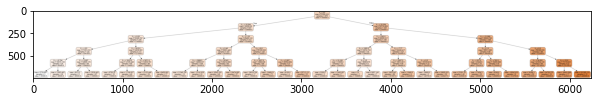

In [179]:
from sklearn.tree import export_graphviz

export_graphviz(clf, out_file="tree.dot", 
                filled=True, rounded=True,
                special_characters=True)

from os import system
system("dot -Tpng tree.dot -o tree.png")   # 將dot檔轉換為png

# 直接讀取該圖檔案裡的圖
import matplotlib.image as mpimg
img = mpimg.imread('tree.png')
fig = plt.figure(figsize=(10,8))
plt.imshow(img)





## 調整 決策樹參數
### 請同學從 criterion 的設定中，判斷這組資料集裡的 outlier 多嗎？

In [180]:
""" Your code here """


def regression_report(y_true, pred, verbose = False):
    mse = MSE(y_true, pred)
    mae = MAE(y_true, pred)
    rmse = np.sqrt(mse)
    mape = MAPE(y_true, pred)
    if verbose:
        print(f'mse = {mse:.4f}')
        print(f'mae = {mae:.4f}')
        print(f'rmse = {rmse:.4f}')
        print(f'mape = {mape:.4f}')
    re_list = [f'mse = {mse:.4f}', f'mae = {mae:.4f}', f'rmse = {rmse:.4f}', f'mape = {mape:.4f}']
    return re_list

# 模型參數
clf = DecisionTreeRegressor(criterion='mse', max_depth = 5, splitter = "best", max_features=0.99)
clf.fit(x_train, y_train)


tra_pred = clf.predict(x_train)
tra_rpt = regression_report(y_train, tra_pred)

val_pred = clf.predict(x_val)
val_rpt = regression_report(y_val, val_pred)

test_pred = clf.predict(x_test)
test_rpt = regression_report(y_test, test_pred)
print('mse:')
for tr, v, tes in zip(tra_rpt, val_rpt, test_rpt):
    print(f"Training report:{tr}    validation report:{v}      Testing report:{tes}")

# 模型參數
clf = DecisionTreeRegressor(criterion='mae', max_depth = 5, splitter = "best", random_state=90)
clf.fit(x_train, y_train)


tra_pred = clf.predict(x_train)
tra_rpt = regression_report(y_train, tra_pred)

val_pred = clf.predict(x_val)
val_rpt = regression_report(y_val, val_pred)

test_pred = clf.predict(x_test)
test_rpt = regression_report(y_test, test_pred)

print('mae:')
for tr, v, tes in zip(tra_rpt, val_rpt, test_rpt):
    print(f"Training report:{tr}    validation report:{v}      Testing report:{tes}")


# 只有mape有可能會發現離群值，因為如果出現離群值這樣mape的分母就會越大，這樣直就會越小，這樣最初來的評價就會越小，這樣會造成評價失真


(876, 89) (219, 89) (365, 89) (876,) (219,) (365,)
mse:
Training report:mse = 677930990.3147    validation report:mse = 1588460610.0730      Testing report:mse = 1921662901.7495
Training report:mae = 17597.1286    validation report:mae = 25363.8319      Testing report:mae = 23636.2931
Training report:rmse = 26037.1079    validation report:rmse = 39855.4966      Testing report:rmse = 43836.7757
Training report:mape = 0.1080    validation report:mape = 0.1441      Testing report:mape = 0.1328
mae:
Training report:mse = 941316300.6478    validation report:mse = 2653701846.6792      Testing report:mse = 2401929506.5404
Training report:mae = 18991.6929    validation report:mae = 23791.2808      Testing report:mae = 27879.1137
Training report:rmse = 30680.8784    validation report:rmse = 51514.0937      Testing report:rmse = 49009.4838
Training report:mape = 0.1114    validation report:mape = 0.1338      Testing report:mape = 0.1527


## 參數探測

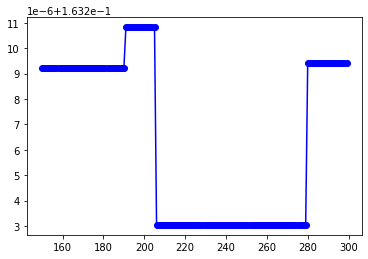

In [268]:
# 參數調整
def regression_report(y_true, pred, verbose = False):
    mse = MSE(y_true, pred)
    mae = MAE(y_true, pred)
    rmse = np.sqrt(mse)
    mape = MAPE(y_true, pred)
    if verbose:
        print(f'mse = {mse:.4f}')
        print(f'mae = {mae:.4f}')
        print(f'rmse = {rmse:.4f}')
        print(f'mape = {mape:.4f}')
    re_list = [mse, mae,rmse,mape]
    return re_list



mse_list = []
mae_list = []
rmse_list = []
mape_list = []
condition_params = [i for i in np.arange(150,300,1)]

for i in condition_params:
    # 模型參數
    clf = DecisionTreeRegressor(ccp_alpha = i, random_state=90)
    clf.fit(x_train, y_train)

    val_pred = clf.predict(x_val)
    report_number_list = regression_report(y_val, val_pred)

    mape_list.append(report_number_list[3])

plt.plot(condition_params,mape_list, 'b-o',label = 'mape')
plt.show()

## 驗證集探測

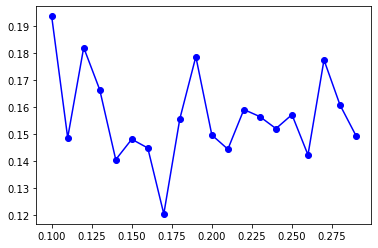

In [318]:
# 參數調整
def regression_report(y_true, pred, verbose = False):
    mse = MSE(y_true, pred)
    mae = MAE(y_true, pred)
    rmse = np.sqrt(mse)
    mape = MAPE(y_true, pred)
    if verbose:
        print(f'mse = {mse:.4f}')
        print(f'mae = {mae:.4f}')
        print(f'rmse = {rmse:.4f}')
        print(f'mape = {mape:.4f}')
    re_list = [mse, mae,rmse,mape]
    return re_list



mse_list = []
mae_list = []
rmse_list = []
mape_list = []
condition_params = [i for i in np.arange(0.1,0.3,0.01)]

for i in condition_params:
    x_train, x_val, y_train, y_val = train_test_split(x_all_train, y_all_train, test_size = i)
    # 模型參數
    clf = DecisionTreeRegressor(criterion='friedman_mse')
    clf.fit(x_train, y_train)

    val_pred = clf.predict(x_val)
    report_number_list = regression_report(y_val, val_pred)

    mape_list.append(report_number_list[3])

plt.plot(condition_params,mape_list, 'b-o',label = 'mape')
plt.show()

## 最佳參數設定

In [344]:
# 切分驗證集
x_train, x_val, y_train, y_val = train_test_split(x_all_train, y_all_train, test_size = 0.17)
print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)

######################## 最佳參數設定
def regression_report(y_true, pred, verbose = False):
    mse = MSE(y_true, pred)
    mae = MAE(y_true, pred)
    rmse = np.sqrt(mse)
    mape = MAPE(y_true, pred)
    if verbose:
        print(f'mse = {mse:.4f}')
        print(f'mae = {mae:.4f}')
        print(f'rmse = {rmse:.4f}')
        print(f'mape = {mape:.4f}')
    re_list = [f'mse = {mse:.4f}', f'mae = {mae:.4f}', f'rmse = {rmse:.4f}', f'mape = {mape:.4f}']
    return re_list

# 模型參數
clf = DecisionTreeRegressor(criterion='friedman_mse', max_depth = 7, splitter = "best", max_features=0.7, min_samples_split = 61, min_samples_leaf = 18, max_leaf_nodes = 73)
clf.fit(x_train, y_train)


tra_pred = clf.predict(x_train)
tra_rpt = regression_report(y_train, tra_pred)

val_pred = clf.predict(x_val)
val_rpt = regression_report(y_val, val_pred)

test_pred = clf.predict(x_test)
test_rpt = regression_report(y_test, test_pred)

for tr, v, tes in zip(tra_rpt, val_rpt, test_rpt):
    print(f"Training report:{tr}    validation report:{v}      Testing report:{tes}")

(908, 89) (187, 89) (365, 89) (908,) (187,) (365,)
Training report:mse = 1226016589.4204    validation report:mse = 840991012.6866      Testing report:mse = 1889008565.5073
Training report:mae = 21433.2704    validation report:mae = 21457.3950      Testing report:mae = 25311.6900
Training report:rmse = 35014.5197    validation report:rmse = 28999.8450      Testing report:rmse = 43462.7262
Training report:mape = 0.1235    validation report:mape = 0.1255      Testing report:mape = 0.1389
